In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils.engine as uv

In [2]:
with open("Validation/SHEBA_Data/01-forcing.dat") as file:
    arr = file.readlines()
    
cols_1 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_1 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [3]:
with open("Validation/SHEBA_Data/02-hs-hi_thickness.dat") as file:
    arr = file.readlines()
    
cols_2 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_2 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [4]:
with open("Validation/SHEBA_Data/06-depth_pit.dat") as file:
    arr = file.readlines()
    
file_6 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])
file_6[:, 0] = np.round(file_6[:, 0], 4)

In [5]:
with open("Validation/SHEBA_Data/07-pit_fcond.dat") as file:
    arr = file.readlines()
    
cols_7 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_7 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [6]:
with open("Validation/SHEBA_Data/08-tocn.dat") as file:
    arr = file.readlines()
    
file_8 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [7]:
with open("Validation/SHEBA_Data/09-focn.dat") as file:
    arr = file.readlines()
    
cols_9 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_9 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [8]:
with open("Validation/SHEBA_Data/10-temp.dat") as file:
    arr = file.readlines()
    
file_10 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [9]:
with open("Validation/SHEBA_Data/11-turbflux.dat") as file:
    arr = file.readlines()
    
cols_11 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
file_11 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [10]:
with open("Validation/SHEBA_Data/12-levels.dat") as file:
    Z = [float(z.replace(' ', '')[:-1]) for z in file.readlines()]

In [11]:
pd.DataFrame(file_2, columns=cols_2)

,jday,hs_best,hf_best,hi_best
0,303.0000,0.1600,0.0,-1.9400
1,303.0417,0.1598,0.0,-1.9401
2,303.0833,0.1596,0.0,-1.9402
3,303.1250,0.1594,0.0,-1.9403
4,303.1667,0.1592,0.0,-1.9404
...,...,...,...,...
8204,644.8334,-0.4432,-0.6,-2.0650
8205,644.8750,-0.4431,-0.6,-2.0649
8206,644.9166,-0.4430,-0.6,-2.0648
8207,644.9584,-0.4429,-0.6,-2.0647


In [17]:
file_9

array([[303.    ,   3.9612],
       [303.0417,   3.9576],
       [303.0833,   3.9544],
       ...,
       [644.9166,      nan],
       [644.9584,      nan],
       [645.    ,      nan]])

In [25]:
data = pd.DataFrame(file_1, columns=cols_1)

data_2 = pd.DataFrame(file_2, columns=cols_2)
data = data.merge(data_2.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_2['jday']*1000).astype('int32')).iloc[:, 1:]

data_6 = pd.DataFrame(file_6, columns=['jday', 'hs', 'hi', 'hs_level', 'hf_level', 'hi_level'])
data = data.merge(data_6.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_6['jday']*1000).astype('int32')).iloc[:, 1:]

data_7 = pd.DataFrame(file_7, columns=cols_7)
data = data.merge(data_7.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_7['jday']*1000).astype('int32')).iloc[:, 1:]

data_8 = pd.DataFrame(file_8, columns=['jday', 'Tocn'])
data = data.merge(data_8.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_8['jday']*1000).astype('int32')).iloc[:, 1:]

data_9 = pd.DataFrame(file_9, columns=cols_9)
data = data.merge(data_9.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_9['jday']*1000).astype('int32')).iloc[:, 1:]

data_10 = pd.DataFrame(file_10, columns=['jday'] + ['T_{}'.format(i) for i in range(1, 51)])
data = data.merge(data_10.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_10['jday']*1000).astype('int32')).iloc[:, 1:]

data_11 = pd.DataFrame(file_11, columns=cols_11)
data = data.merge(data_11.iloc[:, 1:],
                  left_on=(data['jday']*1000).astype('int32'),
                  right_on=(data_11['jday']*1000).astype('int32')).iloc[:, 1:]

In [32]:
data.to_csv('full_data.csv')

In [ ]:
filter_time = lambda arr: (thicknesses[0, 0] <= arr) & (arr < vals[-1, 0])

In [ ]:
filter_vals = filter_time(vals[:, 0])
filter_thicknesses = filter_time(thicknesses[:, 0])

plt.figure(figsize=(20, 10))
plt.imshow(vals[:, 1:][filter_vals].T, aspect='auto', cmap='rainbow',
           extent=[vals[:, 0][filter_vals][0], vals[:, 0][filter_vals][-1], Z[-1], Z[0]])
plt.plot(thicknesses[:, 0][filter_thicknesses], thicknesses[:, 3][filter_thicknesses],
         color='white', lw=3, ls=':', label='snow surface')
plt.plot(thicknesses[:, 0][filter_thicknesses], thicknesses[:, 4][filter_thicknesses],
         color='white', lw=3, ls='--', label='snow-ice interface')
plt.plot(thicknesses[:, 0][filter_thicknesses], thicknesses[:, 5][filter_thicknesses],
         color='white', lw=3, label='ice base')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='lower left', facecolor='black', labelcolor='white', prop={'size': 20})
plt.colorbar()
plt.show()

In [ ]:
mesh_Z = np.array([Z]*sum(filter_vals))

In [ ]:
filter_ice = (thicknesses[:, [5]][filter_thicknesses] < mesh_Z) & \
             (mesh_Z < thicknesses[:, [4]][filter_thicknesses])

In [ ]:
Z_ice = [np.concatenate(([inter], line_ice[filt_ice], [base]))\
         for inter, line_ice, filt_ice, base in zip(thicknesses[:, 4], mesh_Z, filter_ice, thicknesses[:, 5])]

In [ ]:
temp_ice = [line_ice[filt_ice] for line_ice, filt_ice in zip(vals[:, 1:], filter_ice)]

In [ ]:
vis_0 = uv.animate(dzi_arr, dzs_arr,
                   temp_oi_arr, temp_ice_arr, temp_is_arr, temp_snow_arr, temp_sa_arr,
                   timeline,
                   rho_ice_arr, ue.rho_w, ue.rho_s,
                   snow_filter,
                   clip_start=10, clip_end=85)

In [107]:
test1 = \
[
    np.array(
        [
            [[1, 2], [3, 4]],
            [[5, 6], [7, 8]],
            [[9, 10], [11, 12]]
        ]
    )
]

test2 = \
[
    np.array(
        [
            [[1, 2], [3, 4]],
            [[5, 6], [7, 8]],
            [[9, 10], [11, 12]]
        ]
    )
]


    
# for data in zip(zip(*test1), zip(*test2), *(zip(*test) for test in [test1, test2])):
#     print(data)
for i, t in enumerate(zip(zip(*test1), zip(*test2))):
    print(i, t, len(t))

0 ((array([[1, 2],
       [3, 4]]),), (array([[1, 2],
       [3, 4]]),)) 2
1 ((array([[5, 6],
       [7, 8]]),), (array([[5, 6],
       [7, 8]]),)) 2
2 ((array([[ 9, 10],
       [11, 12]]),), (array([[ 9, 10],
       [11, 12]]),)) 2


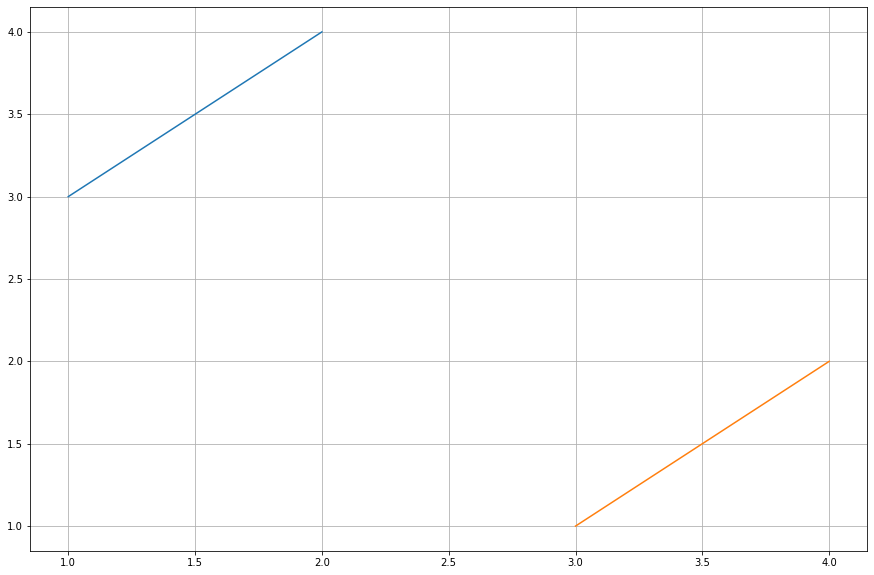

In [47]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
# ax2 = fig.add_subplot()
ax.plot([1, 2], [3, 4])
ax.plot([3, 4], [1, 2])
ax.grid()
plt.show()